In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df['age'].value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

## chart covered in class

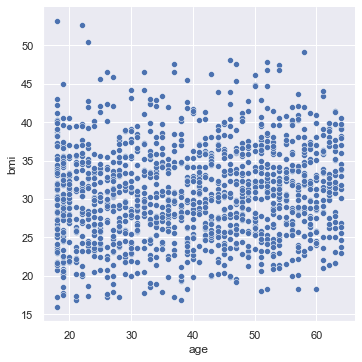

In [21]:
sns.relplot(x='age',y='bmi',data=df) #it gives like a scatter plot

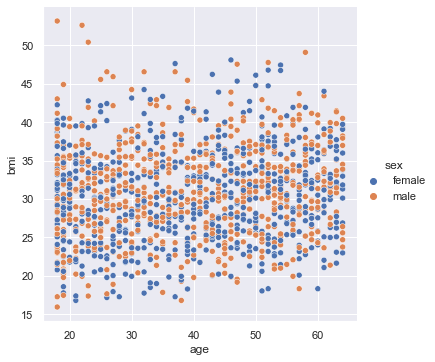

In [33]:
sns.relplot(x='age',y='bmi',hue='sex',data=df) #it is same as above it too gives the scatter plot the only diff is on particular day we can see how many men and women are there

<AxesSubplot:xlabel='age', ylabel='bmi'>

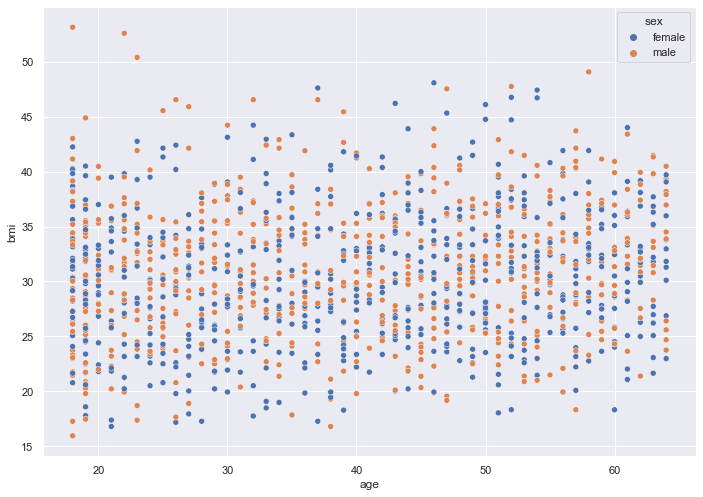

In [25]:
sns.scatterplot(x='age',y='bmi',hue='sex',data=df) #both are same but in relplot we can see another dimension

<AxesSubplot:xlabel='age', ylabel='bmi'>

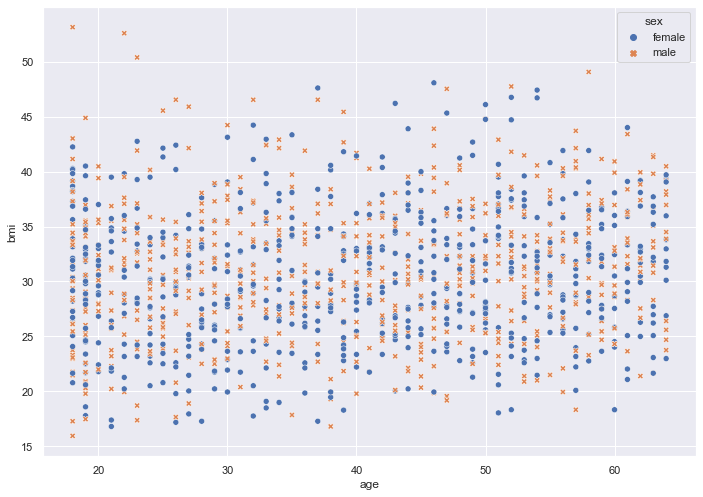

In [26]:
sns.scatterplot(x='age',y='bmi',hue='sex',style='sex',data=df)

<AxesSubplot:xlabel='age', ylabel='bmi'>

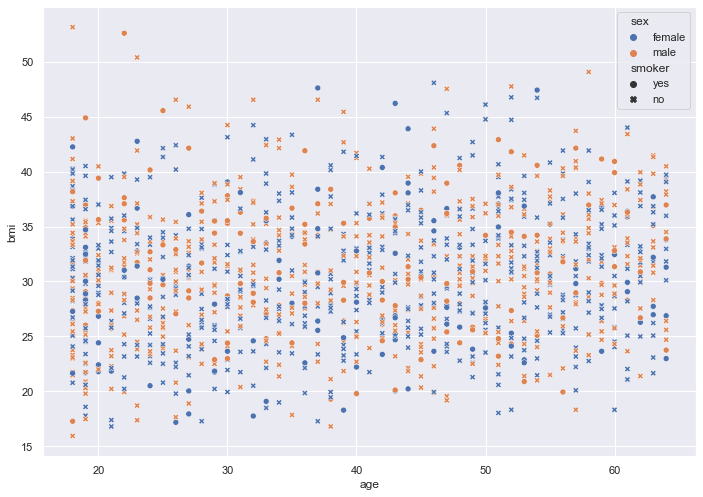

In [30]:
sns.scatterplot(x='age',y='bmi',hue='sex',style='smoker',data=df)

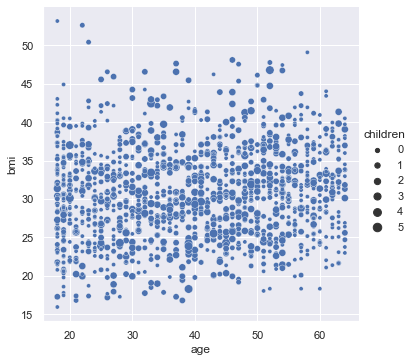

In [37]:
sns.relplot(x='age',y='bmi',size='children',data=df)

In [35]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

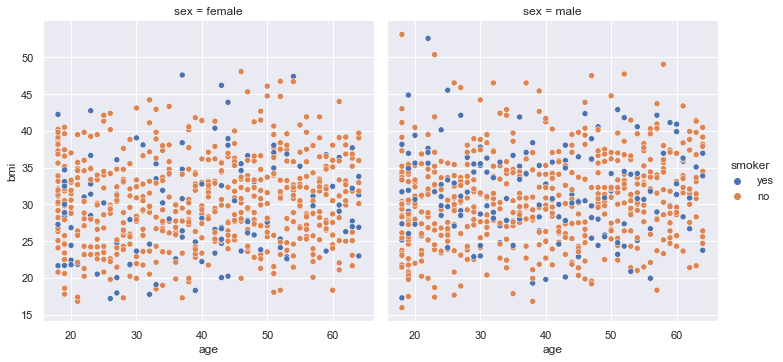

In [39]:
sns.relplot(x='age',y='bmi',hue='smoker',col='sex',data=df) #col parameter is used for subseting the output using another variables

## catplot

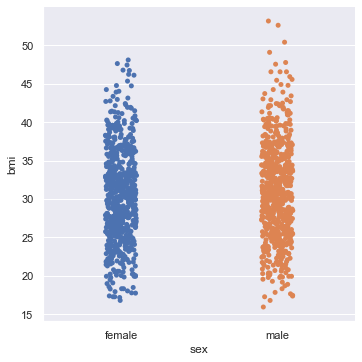

In [42]:
sns.catplot(x='sex',y='bmi',data=df) #it is different from scatter here by default xaxis consider as categorical variable through that we can see male has high bmi that female or not

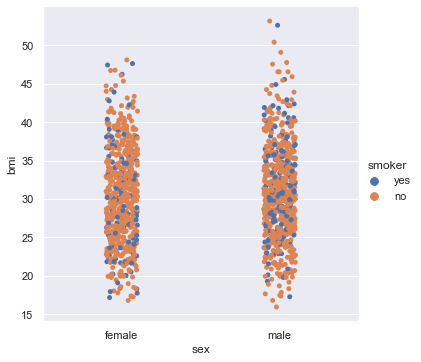

In [49]:
sns.catplot(x='sex',y='bmi',hue='smoker',data=df)

#the parameter order takes list and it tells on which order th x axis will shows the values wether in male and female or swap...

<AxesSubplot:xlabel='sex', ylabel='bmi'>

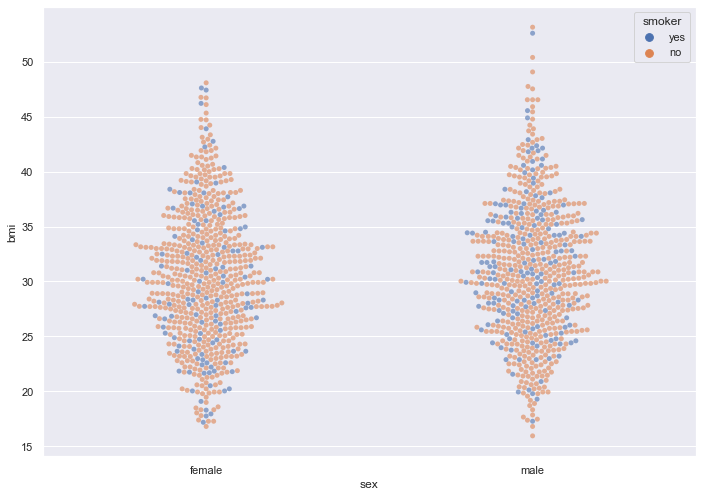

In [48]:
sns.swarmplot(x='sex',y='bmi',hue='smoker',alpha=.6,data=df) #is like catplot but it doesnt overlap with each other

#the parameter alpha is used to shorten the size of the point

## boxplot

<AxesSubplot:xlabel='sex', ylabel='bmi'>

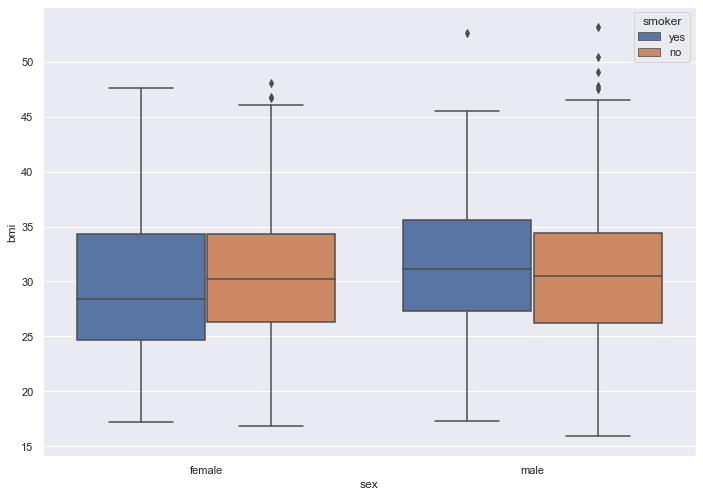

In [51]:
sns.boxplot(x = "sex", y = "bmi", hue = "smoker", data = df)

<AxesSubplot:xlabel='sex', ylabel='bmi'>

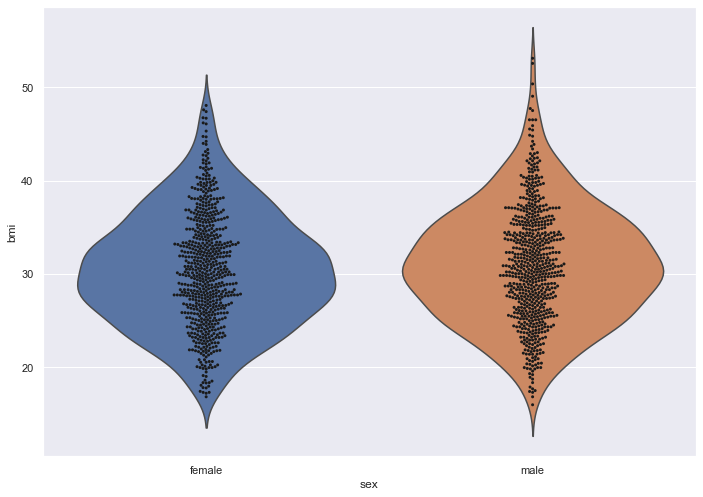

In [52]:
sns.violinplot(x = "sex", y = "bmi", inner = None, data = df)
sns.swarmplot(x = "sex", y = "bmi", color = "k", size = 3, data = df)

## Barplot

<AxesSubplot:xlabel='sex', ylabel='bmi'>

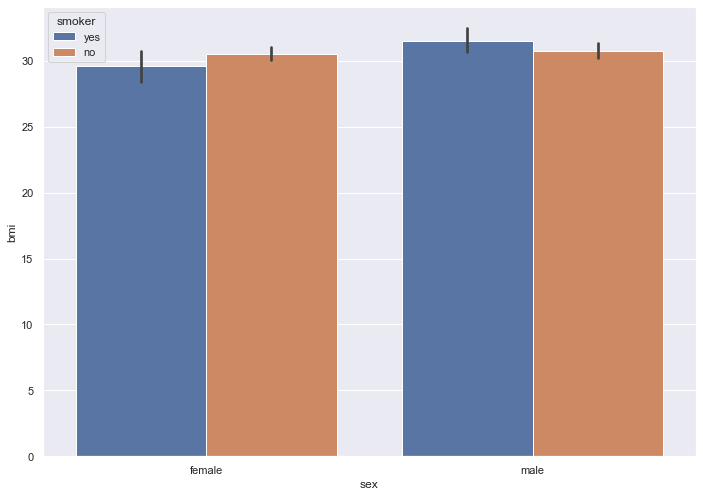

In [55]:
sns.barplot(x = "sex", y='bmi', hue = "smoker", data = df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

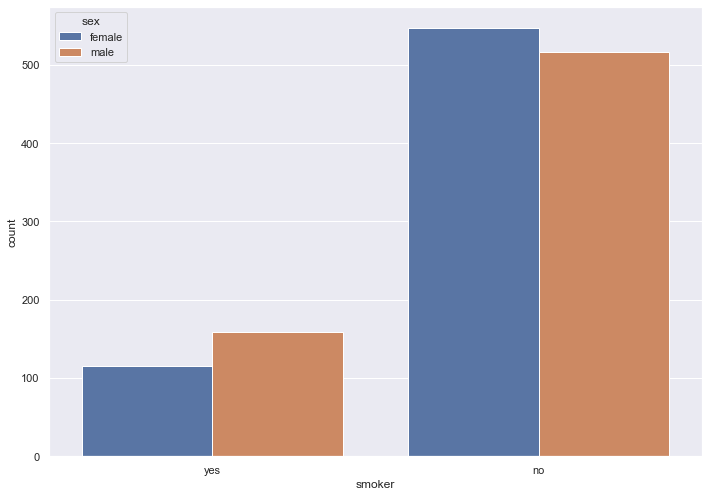

In [60]:
sns.countplot(x = "smoker", hue ="sex", data = df) #as the name suggest it counts the values

## some additional plot

<AxesSubplot:xlabel='age', ylabel='Count'>

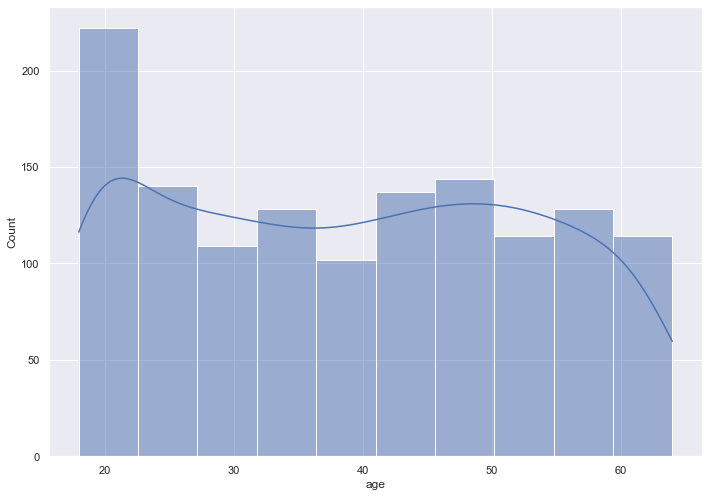

In [67]:
sns.histplot(df['age'],kde=True,bins=10) #kde gives the frequency polygon

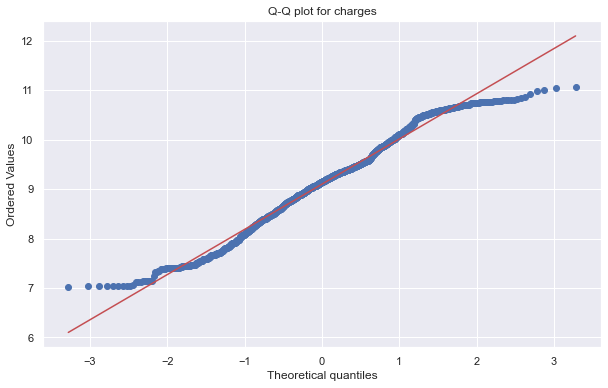

In [73]:

from scipy import stats
plt.figure(figsize=(10,6))
stats.probplot(df['charges'].apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()

<AxesSubplot:>

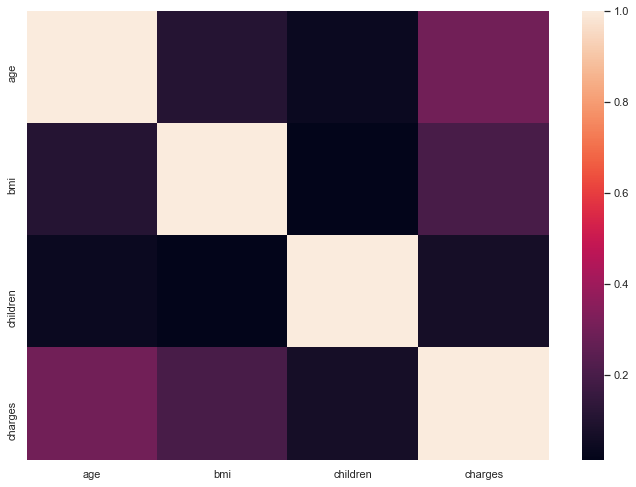

In [12]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='age', ylabel='bmi'>

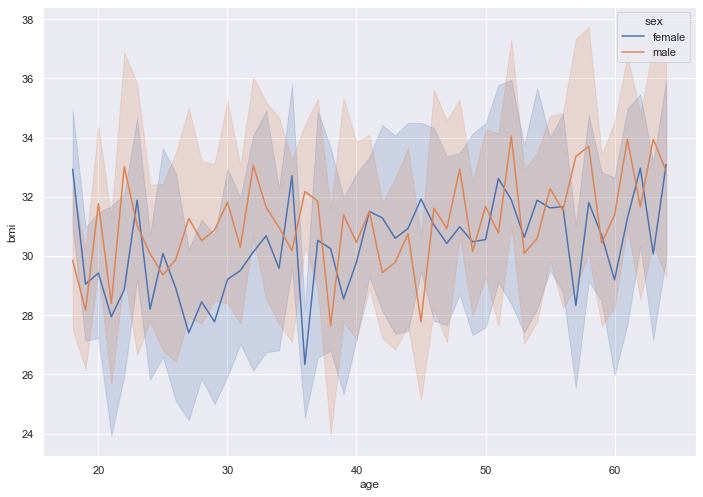

In [14]:
sns.lineplot(x='age',y='bmi',hue='sex',data=df)

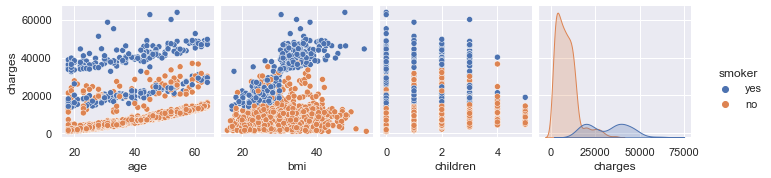

In [78]:
sns.pairplot(df,hue='smoker',y_vars=['charges'])

## Fit one SLR and one MLR model using sklearn

slr:

In [192]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [172]:
X=df.iloc[:,0].values
y=df.iloc[:,2].values
X=X.reshape(-1,1)

In [173]:
y

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

In [174]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


now we need to split our data set why we are doing this means if we are fiting a model for 80% of our data and with help of the same model we are trying to fit for remaining 20% of data and see the accuracy of our model

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [176]:
len(X_train) #80%

1070

In [177]:
len(y_train)

1070

In [178]:
len(X_test) #20%

268

In [179]:
X_train #it was the 1st 80% of our data and it is random sample inspite of picking up 1st 80% so if we use random_state our data must not be change 

array([[52],
       [52],
       [19],
       ...,
       [26],
       [24],
       [60]], dtype=int64)

In [180]:
model=LinearRegression() #here we are definig the object

In [181]:
model.fit(X_train,y_train) #it is actually used to train our model

LinearRegression()

In [182]:
model.predict(X_test) 

array([30.84644636, 31.48441084, 30.28353653, 30.7338644 , 30.80891904,
       29.98331795, 31.4093562 , 30.80891904, 30.50870046, 31.14666494,
       30.24600921, 31.14666494, 30.32106385, 31.44688352, 31.03408297,
       31.59699281, 31.48441084, 30.62128243, 31.52193816, 30.02084528,
       30.50870046, 30.69633707, 31.48441084, 30.7338644 , 30.0583726 ,
       31.63452013, 31.44688352, 30.84644636, 31.52193816, 30.65880975,
       30.58375511, 30.02084528, 29.98331795, 30.24600921, 30.84644636,
       30.02084528, 31.29677423, 31.48441084, 30.65880975, 30.77139172,
       31.37182887, 31.03408297, 30.62128243, 31.4093562 , 31.37182887,
       30.02084528, 31.14666494, 30.3961185 , 31.22171959, 31.33430155,
       30.47117314, 30.47117314, 30.69633707, 30.02084528, 30.13342724,
       30.09589992, 29.98331795, 29.98331795, 30.02084528, 30.88397369,
       30.7338644 , 30.43364582, 30.17095456, 30.54622779, 31.67204745,
       30.99655565, 30.7338644 , 30.84644636, 31.37182887, 30.77

In [183]:
y_test #here both values are more are less similar 

array([28.405, 25.2  , 27.265, 40.565, 32.3  , 29.37 , 39.82 , 28.12 ,
       28.93 , 23.845, 30.3  , 28.7  , 24.75 , 34.01 , 48.07 , 36.385,
       25.175, 26.125, 29.83 , 33.1  , 31.54 , 37.07 , 34.39 , 30.21 ,
       22.   , 32.68 , 33.63 , 32.2  , 34.8  , 29.04 , 23.56 , 30.4  ,
       31.73 , 26.79 , 30.59 , 27.6  , 36.6  , 32.965, 26.2  , 34.1  ,
       32.395, 35.53 , 31.   , 31.79 , 27.645, 21.755, 25.84 , 21.755,
       37.73 , 31.9  , 30.495, 25.74 , 34.105, 20.7  , 28.82 , 27.36 ,
       21.47 , 30.115, 20.6  , 41.325, 16.815, 21.945, 41.91 , 18.5  ,
       26.98 , 33.1  , 21.12 , 28.31 , 30.5  , 21.85 , 29.64 , 26.315,
       29.1  , 25.365, 26.07 , 29.925, 26.315, 27.5  , 41.8  , 39.6  ,
       19.95 , 41.23 , 30.8  , 24.225, 33.33 , 29.9  , 21.375, 23.655,
       26.41 , 37.8  , 47.52 , 41.91 , 21.7  , 35.2  , 34.77 , 43.01 ,
       29.48 , 36.3  , 20.235, 38.06 , 26.22 , 33.82 , 32.3  , 29.5  ,
       32.7  , 31.54 , 34.58 , 35.31 , 24.795, 25.745, 33.63 , 33.88 ,
      

In [184]:
model.score(X_test,y_test) #to check the accuracy

0.017119785098503537

In [185]:
model.score(X_test, model.predict(X_test))

1.0

In [193]:
model.score(X_train, y_train) #due to data

0.007560845817232598

MLR

In [203]:
X=df.iloc[:,[0,2,3]].values
y=df.iloc[:,-1].values

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [206]:
model=LinearRegression()

In [207]:
model.fit(X_train,y_train)

LinearRegression()

In [208]:
model.predict(X_test) 

array([12926.72359055, 15263.02732702,  9981.02561102, 16613.35162369,
       14588.87742694,  7885.35271332, 20072.02614293, 12589.50558821,
       11007.22000242, 14136.16656827,  9370.99006843, 14907.90288778,
        7836.16859437, 18209.01141114, 21687.70180549, 20494.14034501,
       15254.00258242, 10207.21685843, 18640.0495648 ,  8975.74598074,
       11949.40333894, 15117.35641437, 18580.52344296, 13856.1714916 ,
        5693.52983219, 18900.5745676 , 18562.26983434, 14296.67982123,
       19943.73425064, 13455.57615763,  9046.94214833,  8001.07356365,
        8246.85406265,  9084.78500854, 14205.92080999,  6990.30216815,
       19677.93492001, 18066.11300061, 10468.6270061 , 15004.32312447,
       17647.77562324, 16180.02083047, 12457.47659712, 18154.14725888,
       15442.63960757,  4880.31688005, 14365.9066464 ,  7714.11055986,
       18636.31246599, 18215.61884857, 12318.70218301,  9130.89213609,
       14047.0217045 ,  4499.47265782,  8133.71744636,  7372.3364477 ,
      

In [209]:
y_test

array([ 6664.68595, 11837.16   ,  4661.28635,  6373.55735,  6986.697  ,
        1719.4363 , 11090.7178 , 22331.5668 , 19719.6947 , 24106.91255,
        2632.992  ,  8703.456  , 16577.7795 , 11356.6609 ,  9432.9253 ,
       48517.56315, 11931.12525,  5227.98875, 30184.9367 , 23082.95533,
        5148.5526 , 39871.7043 , 11743.9341 ,  7537.1639 ,  1964.78   ,
       13844.7972 , 11945.1327 ,  6775.961  , 36910.60803,  7243.8136 ,
        4992.3764 ,  1256.299  , 33732.6867 ,  4189.1131 ,  7256.7231 ,
        1252.407  , 11264.541  , 12430.95335,  4883.866  , 23563.01618,
       11879.10405, 42111.6647 ,  5240.765  , 43813.8661 , 10594.50155,
        1627.28245, 23807.2406 , 16657.71745,  9877.6077 , 27322.73386,
        6113.23105,  3756.6216 ,  6112.35295,  1242.816  ,  2156.7518 ,
        2104.1134 ,  1702.4553 , 21344.8467 ,  1731.677  ,  7650.77375,
        6640.54485,  4718.20355,  1837.2819 ,  4766.022  , 28950.4692 ,
        7345.084  ,  6652.5288 ,  7153.5539 , 10704.47   ,  6117

In [210]:
model.score(X_test,y_test)

0.1250589316215439

In [214]:
model.score(X_test, model.predict(X_test))

1.0

while doing coding intercept is b0 and coeff is b1 modelscore is used for giving 'r-square' value

In [218]:
model.intercept_

-7425.398236618761

In [219]:
model.coef_

array([234.33591386, 360.98978411, 490.43454117])

In [220]:
y_pred=model.predict(X_test)

In [221]:
residuals=y_test-y_pred

In [222]:
residuals

array([ -6262.03764055,  -3425.86732702,  -5319.73926102, -10239.79427369,
        -7602.18042694,  -6165.91641332,  -8981.30834293,   9742.06121179,
         8712.47469758,   9970.74598173,  -6737.99806843,  -6204.44688778,
         8741.61090563,  -6852.35051114, -12254.77650549,  28023.42280499,
        -3322.87733242,  -4979.22810843,  11544.8871352 ,  14107.20934926,
        -6800.85073894,  24754.34788563,  -6836.58934296,  -6319.0075916 ,
        -3728.74983219,  -5055.7773676 ,  -6617.13713434,  -7520.71882123,
        16966.87377936,  -6211.76255763,  -4054.56574833,  -6744.77456365,
        25485.83263735,  -4895.67190854,  -6949.19770999,  -5737.89516815,
        -8413.39392001,  -5635.15965061,  -5584.7610061 ,   8558.69305553,
        -5768.67157324,  25931.64386953,  -7216.71159712,  25659.71884112,
        -4848.13805757,  -3253.03443005,   9441.3339536 ,   8943.60689014,
        -8758.70476599,   9107.11501143,  -6205.47113301,  -5374.27053609,
        -7934.6687545 ,  

# extra

# seeing that our model met assuption or not

## checking of multicolinearity--> relationship b/w independent variable

In [236]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T #if the values less than 10 means the independent values are correlated with each other

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

## checking the normality of residuals

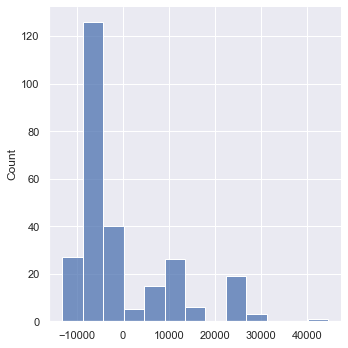

In [234]:
sns.displot(residuals) #through this we can say it is not normal

In [237]:
np.mean(residuals) #if the value  close to 0 our model will be normal

-489.02973148232763

## homoscedacity-->constant var

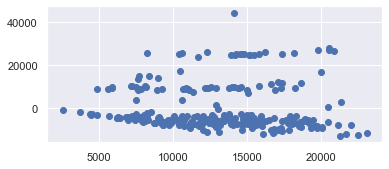

In [243]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residuals) #actually it will wont fallow such pattern

#its a relation b/w residual(error) and predict

<ipython-input-242-d2c00c958e4e>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show() #through this we can say it have no autocorrelation


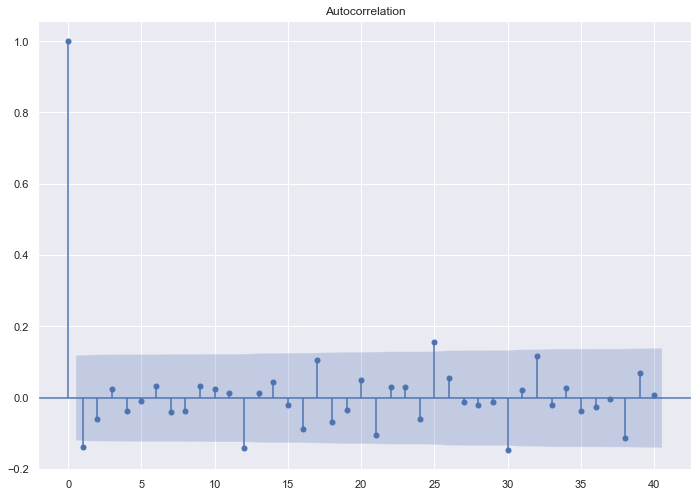

In [242]:
acf = smt.graphics.plot_acf(residuals, lags=40 , alpha=0.05)
acf.show() #through this we can say it have no autocorrelation
